# Trabalho 2

## 4.2.1 Árvores de decisão

Neste notebook está o código relacionado com as Árvores de Decisão na sua utilização para problemas de classificação.

### Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import utilidades as ut

### Inicializações e variáveis

In [2]:
warnings.filterwarnings("ignore")  # Desabilitar warnings.
# Garantir que se utiliza um estilo definido centralmente e comum a todos os gráficos.
plt.style.use("style/estilo.mplstyle")
# plt.style.use('ggplot')

%matplotlib inline

label_encoder = LabelEncoder()

ficheiro = "dados_preparados.csv"
colunas_numericas = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
colunas_classes = ["Genero", "Historico_obesidade_familiar", "FCCAC", "Fumador", "MCC", "CCER", "CBA", "TRANS"]
colunas_classes_binarias = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']
colunas_classes_multiplos = ["CCER", "CBA", "TRANS", "Label"]

## Leitura dos dados preparados

In [3]:
dados_trabalho = pd.read_csv(ficheiro)

In [4]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,Feminino,21.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,1.000000,Nao,Transportes_Publicos,Peso_Normal,24.386526
1,Feminino,21.000000,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.000000,Sim,3.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal,24.238227
2,Masculino,23.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,1.000000,Frequentemente,Transportes_Publicos,Peso_Normal,23.765432
3,Masculino,27.000000,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I,26.851852
4,Masculino,22.000000,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20.976842,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.901475
2107,Feminino,21.982942,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.741923
2108,Feminino,22.524036,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.543817
2109,Feminino,24.361936,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.071535


Temos no entanto de realizar primeiro o encoding das classes para valores numéricos, esta operação é realizada usando o ``sklearn.preprocessing.LabelEncoder`` em todas as colunas com apenas 2 classes.

In [5]:
ut.titulo("Valores codificados por atributo")

# for coluna in colunas_classes_binarias:
for coluna in colunas_classes:
    if dados_trabalho[coluna].dtype == 'object':
        dados_trabalho[coluna] = label_encoder.fit_transform(dados_trabalho[coluna].values)
        ut.etiqueta_e_valor(coluna, str(sorted(dados_trabalho[coluna].unique())))

Valores codificados por atributo
Genero: [0, 1]
Historico_obesidade_familiar: [0, 1]
FCCAC: [0, 1]
Fumador: [0, 1]
MCC: [0, 1]
CCER: [0, 1, 2, 3]
CBA: [0, 1, 2, 3]
TRANS: [0, 1, 2, 3, 4]


?? Para colunas que têm mais que 2 classes precisamos de utilizar o ``pandas.get_dummies()``.

In [6]:
# dados_trabalho = pd.get_dummies(dados_trabalho, dtype=float)

In [7]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,4,Peso_Normal,24.386526
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,4,Peso_Normal,24.238227
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,0,4,Peso_Normal,23.765432
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,0,2,Excesso_Peso_Grau_I,26.851852
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,4,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,4,Obesidade_Mórbida,44.901475
2107,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,4,Obesidade_Mórbida,43.741923
2108,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,4,Obesidade_Mórbida,43.543817
2109,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,4,Obesidade_Mórbida,44.071535


## Holdout

divide o dataset em target(y) e feature(x)

In [8]:
y = dados_trabalho.loc[:, "Label"].values
X = dados_trabalho.drop(["Label"], axis=1).values

### Codificação

Utilizar o ``sklearn.preprocessing.labelEncoder()`` no y

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

### Divisão dos dados em treino e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((1688, 15), (423, 15))

## Árvore de decisão

### Parametrização

Estes valores podem ser ajustados, com base nos gráficos de overfitting.

In [11]:
random_state = 42
max_depth = 5
min_samples_leaf = 16

In [12]:

clf = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    random_state=random_state,
)

### Treino do modelo

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=16, random_state=42)

## Plot da árvore

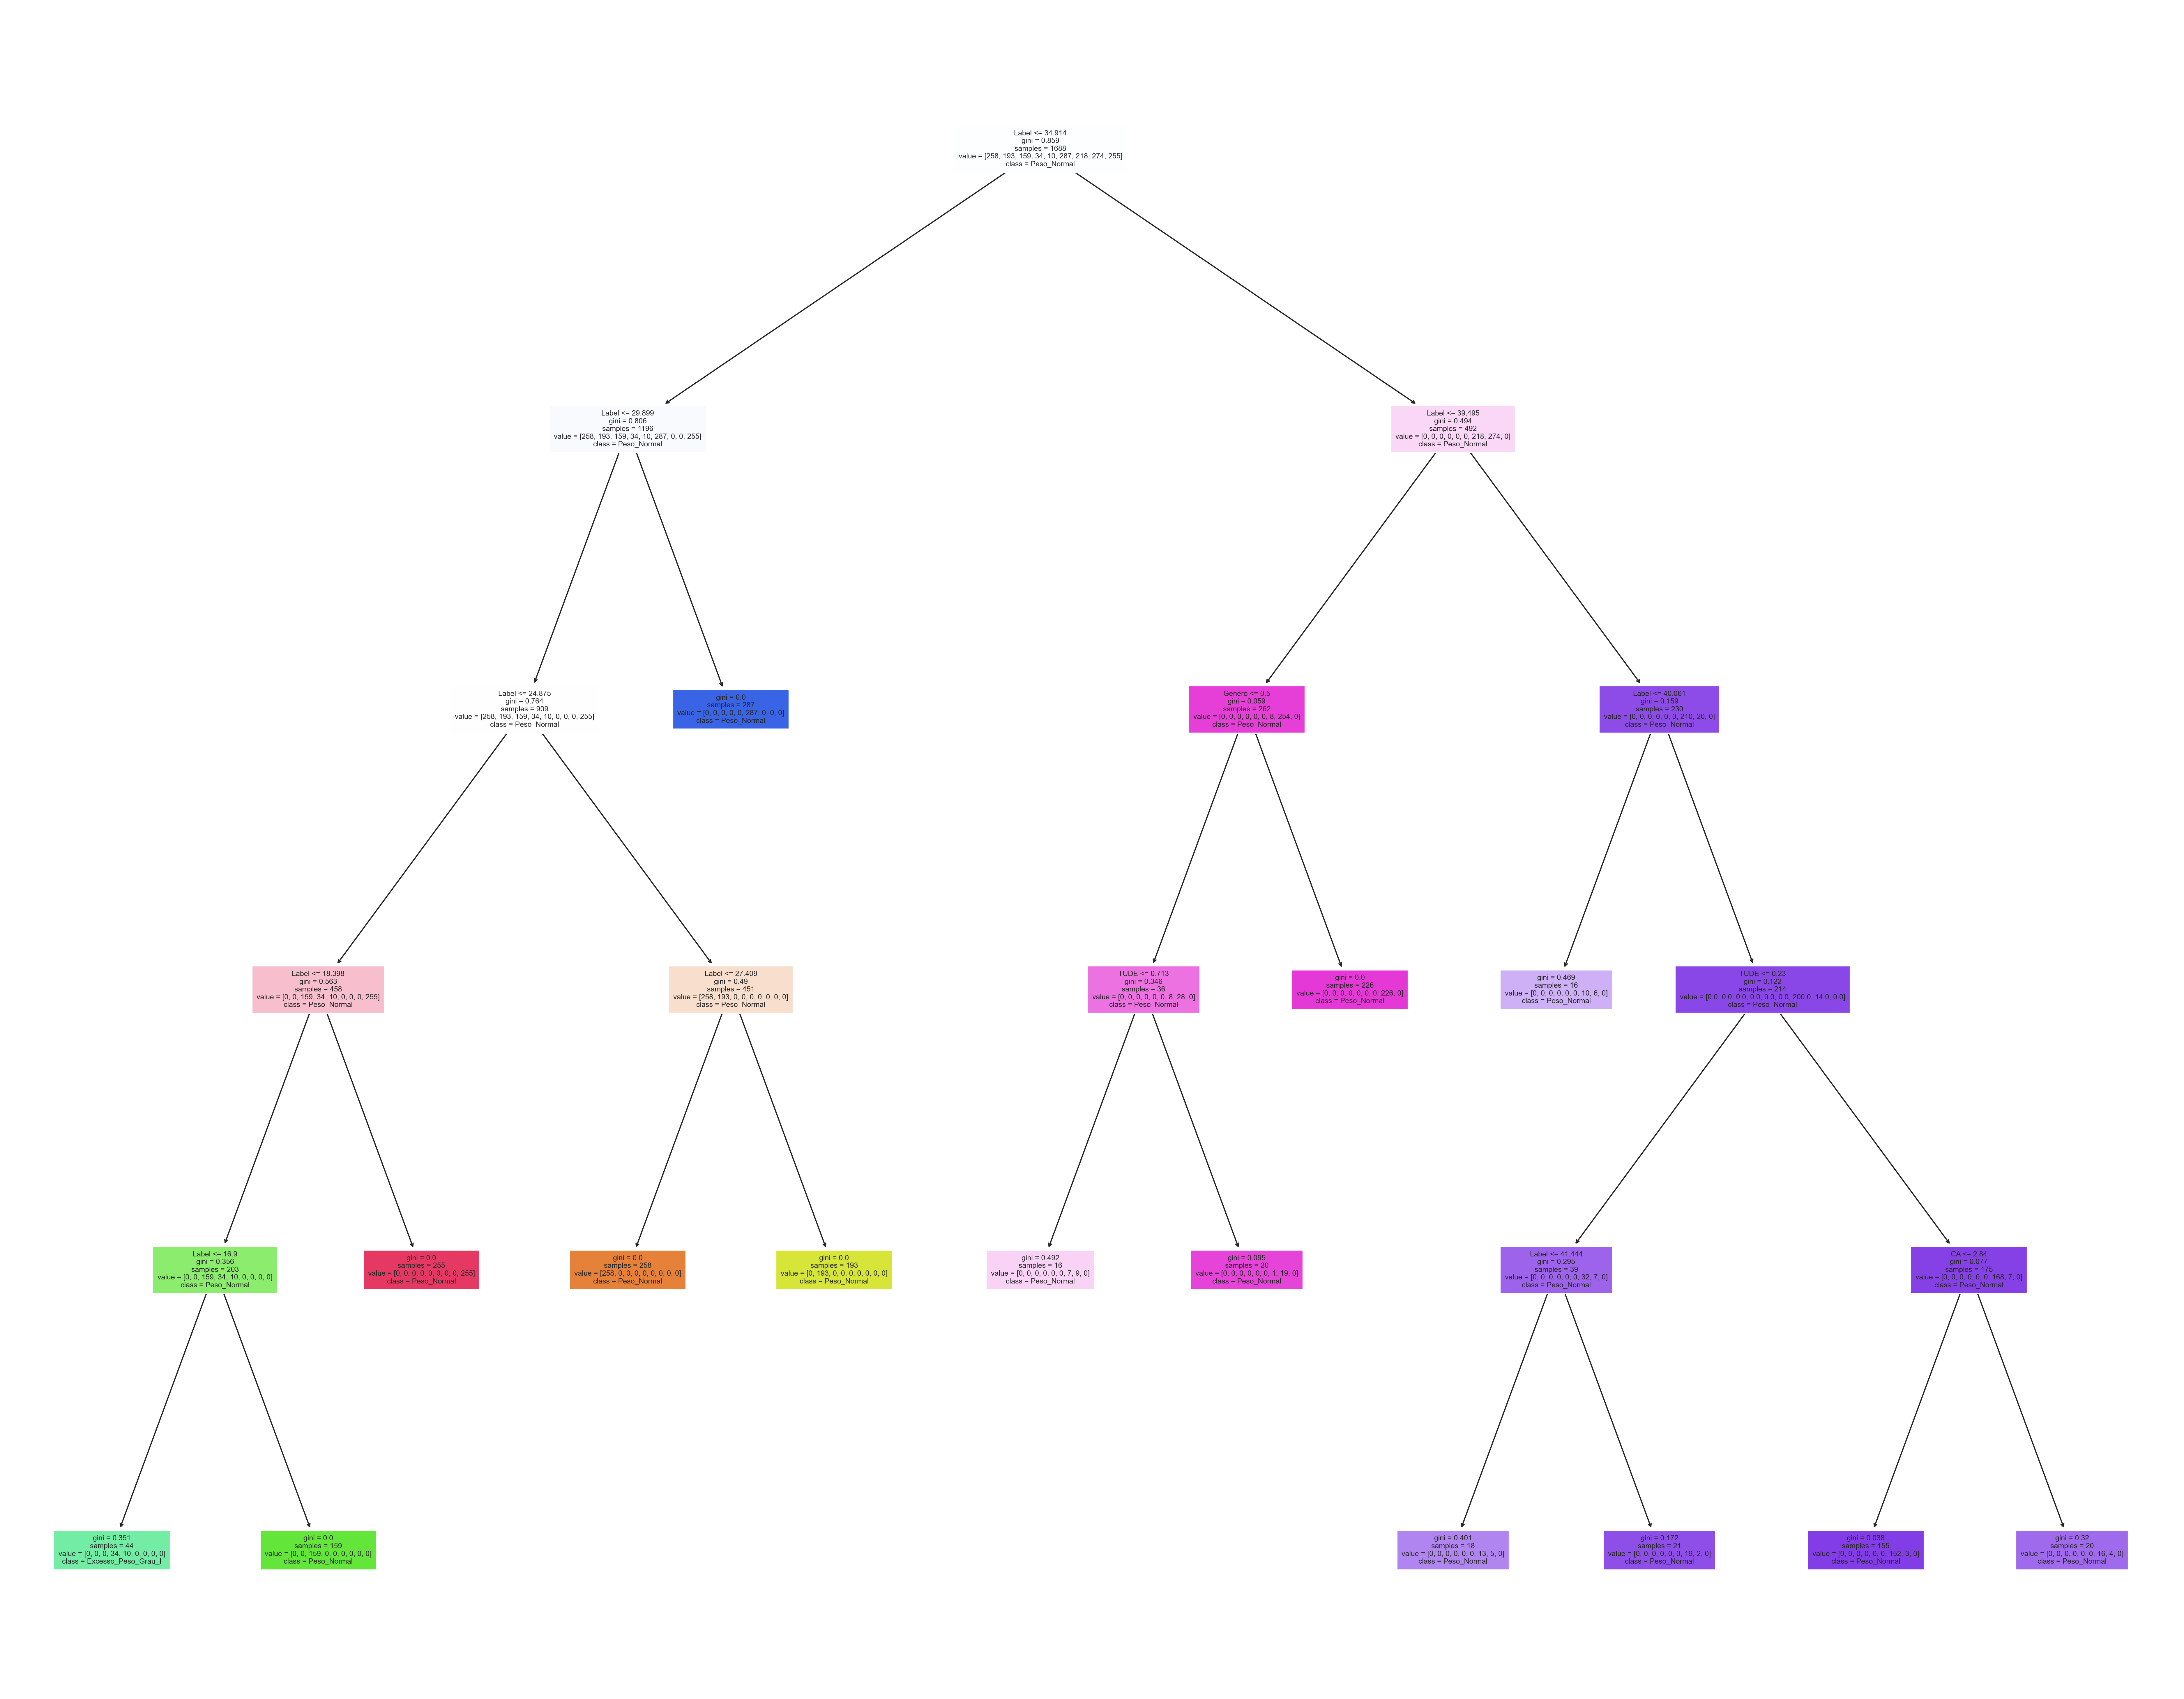

In [14]:
plt.figure(figsize=(32, 25))  # set plot size (denoted in inches)
plot_tree(
    clf,
    feature_names=list(dados_trabalho.columns),
    class_names=list(dados_trabalho['Label']),
    filled=True,
    fontsize=6
);

### Precisão

Verificar a precisão dos dados de treino e teste.

In [15]:
clf.score(X_train, y_train)

0.9774881516587678

### Previsões com decision tree

In [16]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

### Avaliação dos dados de treino e teste

In [17]:
tree_train = accuracy_score(y_train, y_train_pred)
ut.etiqueta_e_valor("Train Accuracy:", tree_train)
tree_test = accuracy_score(y_test, y_test_pred)
ut.etiqueta_e_valor("Test Accuracy:", tree_test)

Train Accuracy:: 0.9774881516587678
Test Accuracy:: 0.9716312056737588


## Erros

In [18]:
# Rate de erro da decision tree
cmatrix = confusion_matrix(
    y_true=y_train,
    y_pred=clf.predict(X_train),
    labels=[True, False]
)
ut.titulo("Confusion Matrix Training")
print(cmatrix)

# Error rate dos dados de treino
error_rate = (cmatrix[0, 1] + cmatrix[1, 0]) / cmatrix.sum()
ut.etiqueta_e_valor("Training Error Rate:", error_rate)

ypred = clf.predict(X_test)

cmatrix = confusion_matrix(y_true=y_test, y_pred=ypred, labels=[True, False])
ut.titulo("Confusion Matrix Test")
print(cmatrix)

# Error rate dos dados de teste
error_rate_test = (cmatrix[0, 1] + cmatrix[1, 0]) / cmatrix.sum()
ut.etiqueta_e_valor("Test Error Rate:", error_rate_test)

Confusion Matrix Training
[[193   0]
 [  0 258]]
Training Error Rate:: 0.0
Confusion Matrix Test
[[45  0]
 [ 0 70]]
Test Error Rate:: 0.0


## Matriz de confusão

Classification report Decision Tree: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        49
           3       0.90      1.00      0.95         9
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00        83
           6       0.89      0.92      0.91        53
           7       0.93      0.90      0.92        63
           8       1.00      0.98      0.99        50

    accuracy                           0.97       423
   macro avg       0.86      0.87      0.86       423
weighted avg       0.97      0.97      0.97       423



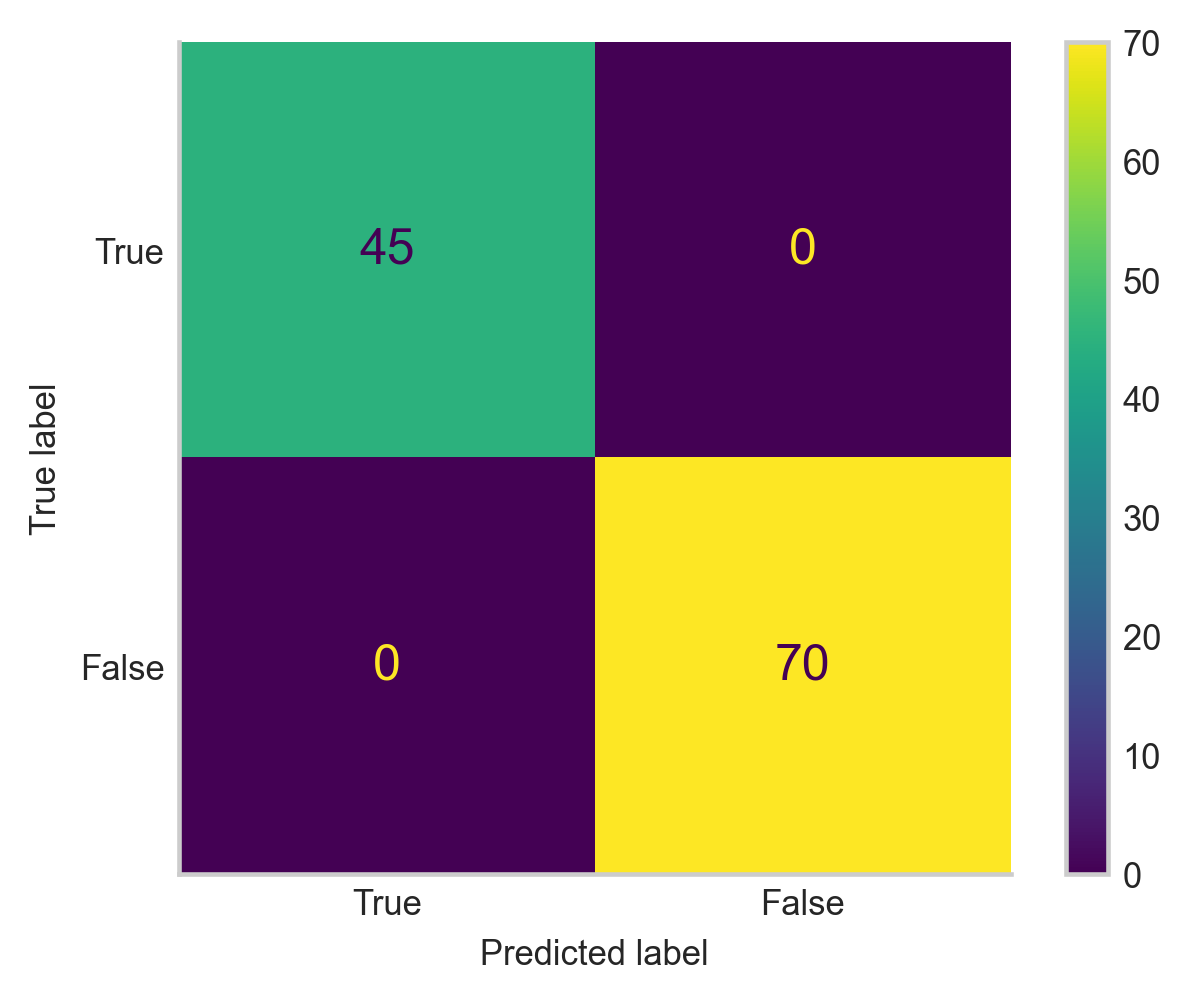

In [19]:
def matriz_confusao(actual, predicted):
    # outcome values order in sklearn
    matrix = confusion_matrix(y_true=actual, y_pred=predicted, labels=[True, False])
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[True, False])
    disp.plot()

    # classification report for precision, recall f1-score and accuracy
    # usei o parametro zero_division por causa do f1-score
    matrix = classification_report(actual, predicted, zero_division=0)
    print('Classification report Decision Tree: \n', matrix)


# chamada Ã  funÃ§Ã£o
res = matriz_confusao(y_test, ypred)


## K-Fold Cross Validation - implementation

### Splitting the Data into Folds

In [20]:
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds


# Define the number of folds (K)
k = 5
# Get the fold indices
fold_indices = kfold_indices(X, k)

In [21]:
model = DecisionTreeClassifier()

scores = []
prevs_folds = []
y_folds = []

# Iterate through each fold
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    # Train the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(y_test, y_pred)

    # Append the fold score to the list of scores
    scores.append(fold_score)

    # Append the prevs and labels of the test set
    prevs_folds.append(y_pred)
    y_folds.append(y_test)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
ut.etiqueta_e_valor("K-Fold Cross-Validation Scores:", scores)
ut.etiqueta_e_valor("Mean Accuracy:", mean_accuracy)
ut.etiqueta_e_valor("Standart Deviation:", std_accuracy)

K-Fold Cross-Validation Scores:: [0.9834123222748815, 0.8862559241706162, 0.995260663507109, 0.995260663507109, 0.8957345971563981]
Mean Accuracy:: 0.9511848341232227
Standart Deviation:: 0.04942562208335045


### Reconstruir a arvore com diferentes valores

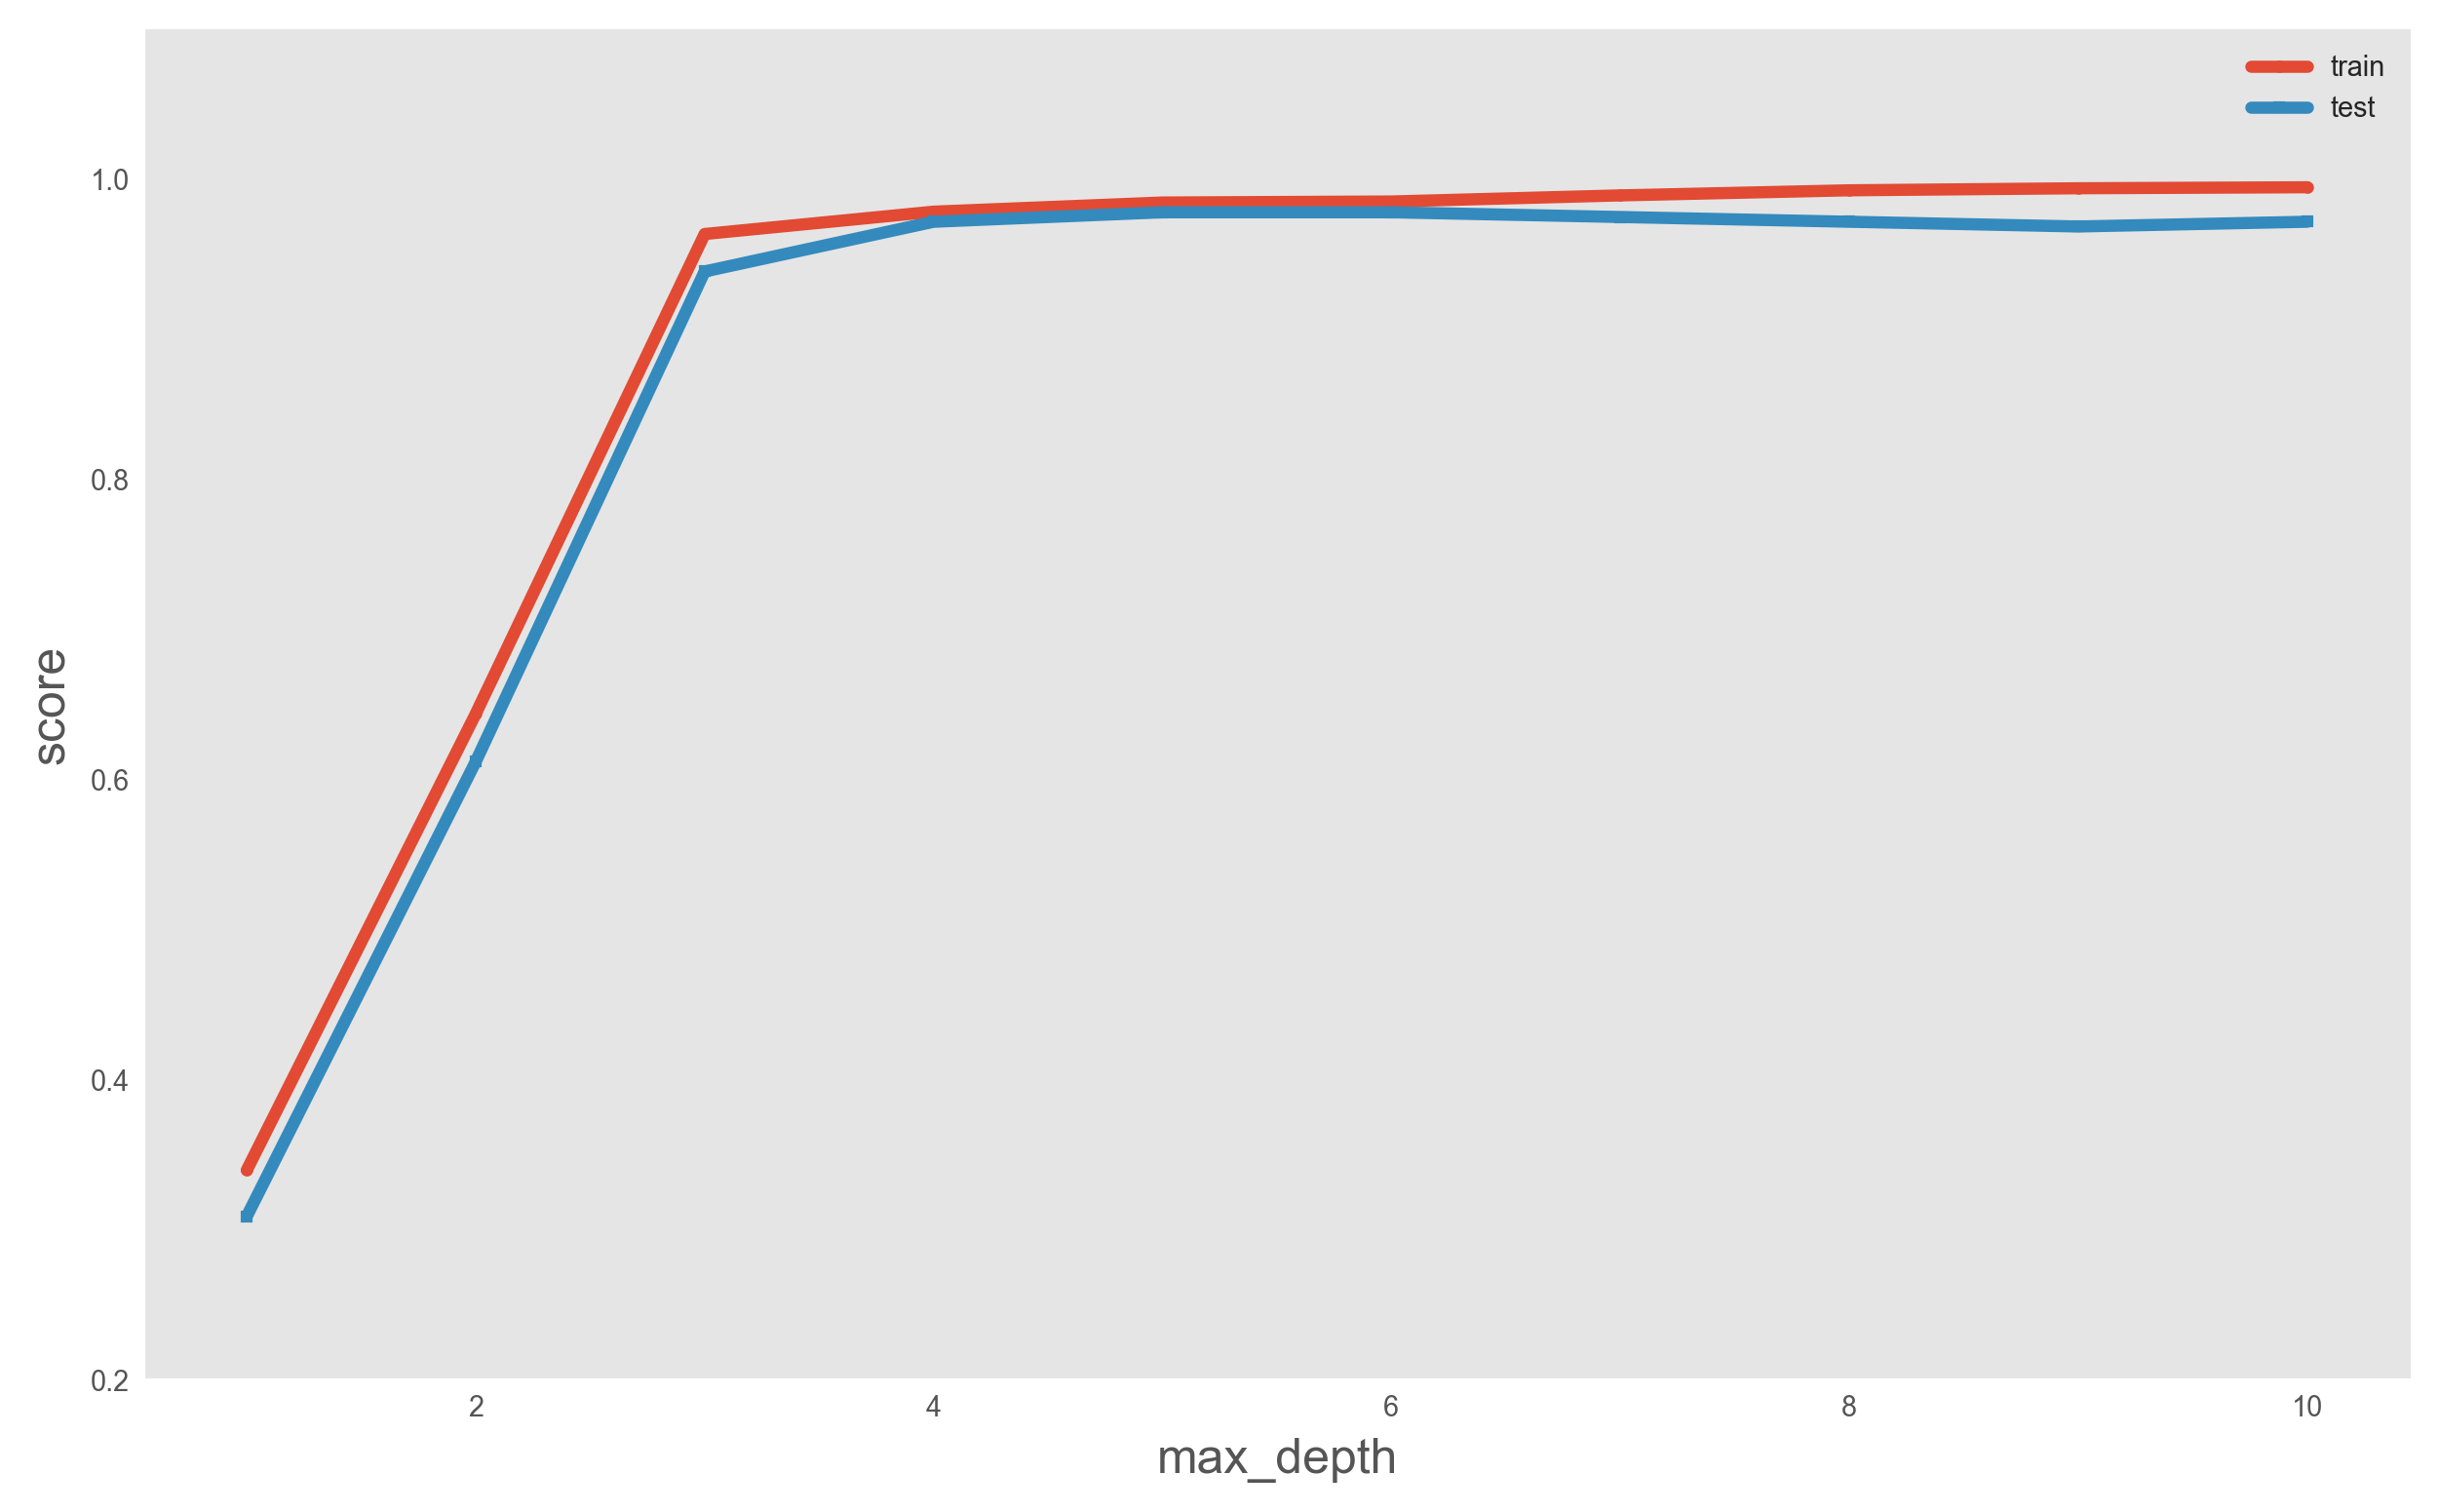

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

max_depths = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# For each of these values, we want to run the full model cascade from start to finish. 
# We also want to record the train and test scores. We do this in a for loop:
train_score = []
test_score = []
for d in max_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.ylim(0.2, 1.1)
plt.legend();

Antes de fazer-se o ajusto com overfitting foi obtido os seguintes valores usando o random state 42
Train Accuracy: 1.0
Test Accuracy: 0.9668769716088328

Confusion Matrix Training /t
[[171   0]
 [  0 227]]
Training Error Rate: 0.0

Confusion Matrix Test
[[ 67   0]
 [  0 101]]
Test Error Rate: 0.0